In [17]:
%pylab inline
import numpy as np
X_train_LSI = np.load('./data/X_train_LSI.npy')
X_test_LSI = np.load('./data/X_test_LSI.npy')
y_train_LSI = np.load('./data/y_train_LSI.npy')
y_test_LSI = np.load('./data/y_test_LSI.npy')

Populating the interactive namespace from numpy and matplotlib


In [3]:
#naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train_LSI, y_train_LSI).predict(X_test_LSI)

accuracy:  0.906349206349


In [11]:
prob = gnb.predict_proba(X_test_LSI)
print prob.shape
prob

(3150, 2)


array([[  9.85651017e-01,   1.43489828e-02],
       [  9.22976972e-01,   7.70230283e-02],
       [  9.68594214e-01,   3.14057861e-02],
       ..., 
       [  1.48089193e-01,   8.51910807e-01],
       [  1.98277321e-06,   9.99998017e-01],
       [  9.91404633e-05,   9.99900860e-01]])

In [12]:
print y_test_LSI.shape
def makeDecisionArray(y):
    y_test = np.array([[0 for i in range(2)] for j in range(len(y_test_LSI))])
    for i in range(len(y_test_LSI)):
        y_test[i][y_test_LSI[i]]=1
    return y_test
y_test = makeDecisionArray(y_test_LSI)
print y_test.shape

(3150,)
(3150, 2)


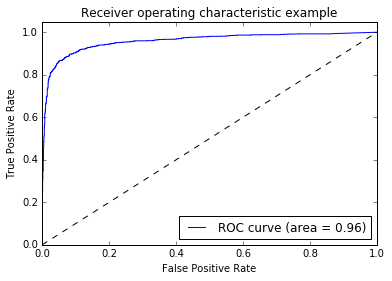

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(y_test[:,0], prob[:,0])
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_LSI, y_pred)

array([[1373,  187],
       [ 108, 1482]])

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test_LSI, y_pred, average=None)  
recall = recall_score(y_test_LSI, y_pred, average=None)
print 'accuracy: ', 1.0*sum(y_pred==y_test_LSI) / y_test_LSI.shape[0]
print 'precision: ', precision
print 'recall: ', recall

accuracy:  0.906349206349
precision:  [ 0.9270763   0.88795686]
recall:  [ 0.88012821  0.93207547]
